In [2]:
import ROOT as root
import utility_common as common
from pylab import *
%matplotlib inline


Welcome to JupyROOT 6.16/00


In [3]:
baseDir = common.getBaseDirectory()
f = root.TFile(baseDir+'data/root/arc.root')
eraLumin  = {"B":5.750,"C":2.573,"D":4.242,"E":4.025,"F":3.105,"G":7.576,"H":8.651}
cutFlow = {1:"all",2:"pass_Lumin_Mask",3:"good_vertex",4:"pass_trigger",5:"pass_muTrigger",6:"pass_eTrigger"}

In [13]:
nTotal,means,stds = 0,[],[]
stage = 5

for era in ["B","C","D","E","F","G","H"]:
    
    n = f.Get("TotalEvents_muon_2016"+era).GetBinContent(stage)
    if stage==5:
        doubleCount = f.Get("TotalEvents_muon_2016"+era).GetBinContent(4)
        n -= doubleCount
    lumin = eraLumin[era]
    
    rate = n/lumin
    rateVar = rate**2 * (1/n + 0.025**2)
    means.append(rate)
    stds.append(rateVar**0.5)
    print("{:6.1f}+/-{:6.1f}".format(rate,rateVar**0.5))
    nTotal += n

aveAll = nTotal/35.9

9804373.7+/-245112.8
9488429.8+/-237218.5
9580347.2+/-239513.4
9294887.7+/-232377.2
9260854.8+/-231527.8
9872768.3+/-246821.8
9975626.6+/-249393.0


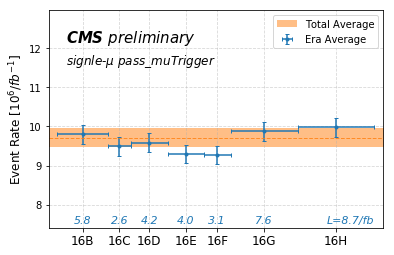

In [15]:

lumin_list = np.array([5.750,2.573,4.242,4.025,3.105,7.576,8.651])
xstd = lumin_list/2
xpos = np.cumsum(lumin_list) - xstd

ypos = np.array([i/1e6 for i in means])
ystd = np.array([i/1e6 for i in stds ])
plt.figure(facecolor='w',figsize=(6,4))


ave = aveAll/1e6
aveStd = ave*0.025
plt.fill_between(np.arange(-2,40),ave+aveStd,ave-aveStd, alpha=0.5, color='C1',lw=0,label='Total Average')
plt.axhline(ave, color='C1',lw=1, alpha=0.8, linestyle="--")

#plt.errorbar(xpos,ypos,yerr=ypos*0.025,fmt='o',label='Era Average')
plt.errorbar(xpos,ypos,yerr=ystd,xerr=xstd, color='C0',fmt='.', capsize=2,label='Era Average')
plt.ylabel(r'Event Rate [$10^6/fb^{-1}$]',fontsize=12)
plt.xticks(xpos,['16B','16C','16D','16E','16F','16G','16H'],fontsize=12)
plt.xlim(-1,37)

ylower, yupper = 0.8*ypos.min(),1.3*ypos.max()
yrange = yupper-ylower
plt.ylim(ylower,yupper)

plt.grid(linestyle='--',alpha=0.5)

for i in range(len(xpos)):
    string = r'{:3.1f}'.format(lumin_list[i])
    if i == len(xpos)-1:
        string = 'L='+string
        string += r'/fb'
    plt.text(xpos[i]-1, ylower+yrange*0.02, string, color='C0', style='italic', fontsize='11')


plt.text(1, yupper-yrange*0.15, r'CMS $preliminary$',style='italic',fontsize='15',fontweight='bold')
plt.text(1, yupper-yrange*0.25, r'signle-$\mu$ '+cutFlow[stage],style='italic',fontsize='12')

plt.legend()
plt.savefig(baseDir+'plots/data_muon_{}.png'.format(cutFlow[stage]),dpi=300)